# Coronavirus (COVID-19) Visualization & Prediction
                        
This report will give a visualization to the Covid-19 Pandemic in Namibia starting from 01 January 2020 until 30 September 2021. It will also give a prediction of the number of infections and deaths for the months of October and November 2021.
            

In [1]:
# Importing the different packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
import seaborn as sns
import plotly.express as px 
import datetime as dt
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.style.use('fivethirtyeight')
plt.style.use('seaborn')
%matplotlib inline 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

# Import the data

In [35]:
confirmed_cases = pd.read_csv('time_series_covid_19_confirmed_na.csv')
death_cases = pd.read_csv('time_series_covid_19_deaths_na.csv')
recovered_cases = pd.read_csv('time_series_covid_19_recovered_na.csv')
latest_data = pd.read_csv('Regions.csv')

# Checking to make sure the data loaded

In [36]:
confirmed_cases.head()

Region  2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  \
0        Erongo           0           0           0           0           0   
1        Hardap           0           0           0           0           0   
2         Karas           0           0           0           0           0   
3  Kavango East           0           0           0           0           0   
4  Kavango West           0           0           0           0           0   

   2020-01-06  2020-01-07  2020-01-08  2020-01-09  ...  2021-09-21  \
0           0           0           0           0  ...       18222   
1           0           0           0           0  ...        7448   
2           0           0           0           0  ...        7785   
3           0           0           0           0  ...        5474   
4           0           0           0           0  ...         637   

   2021-09-22  2021-09-23  2021-09-24  2021-09-25  2021-09-26  2021-09-27  \
0       18238       18240       18242       18252       18255       18255   
1        7457        7468        7481        7481        7488        7502   
2        7787        7788        7789        7789        7789        7794   
3        5478        5479        5479        5480        5480        5480   
4         639         639         639         639         639         639   

   2021-09-28  2021-09-29  2021-09-30  
0       18256       18260       18267  
1        7505        7530        7543  
2        7799        7801        7805  
3        5480        5490        5491  
4         639         639         639  

[5 rows x 640 columns]

In [37]:
death_cases.head()

Region  2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  \
0        Erongo           0           0           0           0           0   
1        Hardap           0           0           0           0           0   
2         Karas           0           0           0           0           0   
3  Kavango East           0           0           0           0           0   
4  Kavango West           0           0           0           0           0   

   2020-01-06  2020-01-07  2020-01-08  2020-01-09  ...  2021-09-21  \
0           0           0           0           0  ...         410   
1           0           0           0           0  ...         257   
2           0           0           0           0  ...         145   
3           0           0           0           0  ...         195   
4           0           0           0           0  ...          18   

   2021-09-22  2021-09-23  2021-09-24  2021-09-25  2021-09-26  2021-09-27  \
0         410         410         410         410         410         410   
1         257         257         257         257         257         257   
2         145         145         145         145         145         145   
3         195         195         195         195         195         195   
4          18          18          18          18          18          18   

   2021-09-28  2021-09-29  2021-09-30  
0         410         410         410  
1         257         257         257  
2         146         147         147  
3         195         195         195  
4          18          18          18  

[5 rows x 640 columns]

In [38]:
recovered_cases.head()

Region  2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  \
0        Erongo           0           0           0           0           0   
1        Hardap           0           0           0           0           0   
2         Karas           0           0           0           0           0   
3  Kavango East           0           0           0           0           0   
4  Kavango West           0           0           0           0           0   

   2020-01-06  2020-01-07  2020-01-08  2020-01-09  ...  2021-09-21  \
0           0           0           0           0  ...       17740   
1           0           0           0           0  ...        7144   
2           0           0           0           0  ...        7549   
3           0           0           0           0  ...        5264   
4           0           0           0           0  ...         610   

   2021-09-22  2021-09-23  2021-09-24  2021-09-25  2021-09-26  2021-09-27  \
0       17740       17740       17783       17783       17783       17783   
1        7158        7158        7161        7161        7161        7161   
2        7549        7549        7549        7549        7549        7549   
3        5268        5270        5270        5270        5270        5270   
4         610         611         611         611         611         611   

   2021-09-28  2021-09-29  2021-09-30  
0       17794       17798       17798  
1        7161        7166        7177  
2        7549        7549        7549  
3        5270        5272        5283  
4         611         611         611  

[5 rows x 640 columns]

In [3]:
latest_data.head()

Date  Region  Confirmed  Cumulative_Cases  Recovered  \
0  2020-01-01  Erongo          0                 0          0   
1  2020-01-02  Erongo          0                 0          0   
2  2020-01-03  Erongo          0                 0          0   
3  2020-01-04  Erongo          0                 0          0   
4  2020-01-05  Erongo          0                 0          0   

   Cumulative_Recoveries  Accumulated_Active_Cases  Active_Cases  \
0                      0                         0             0   
1                      0                         0             0   
2                      0                         0             0   
3                      0                         0             0   
4                      0                         0             0   

   Accumulated_Deaths  Deaths  Accumulated_Non_Covid_Death  Non_Covid_Death  
0                   0       0                            0                0  
1                   0       0                            0                0  
2                   0       0                            0                0  
3                   0       0                            0                0  
4                   0       0                            0                0

In [39]:
# retrieve the column headings
cols = confirmed_cases.keys()
cols

Index(['Region', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
       '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       ...
       '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-25',
       '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30'],
      dtype='object', length=640)

# Get all the dates for the outbreak

In [41]:
# remove the columns not needed and only bring back the date data
confirmed = confirmed_cases.loc[:, cols[1]:cols[-1]]
deaths = death_cases.loc[:, cols[1]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[1]:cols[-1]]

In [42]:
# check the data
confirmed

2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05  2020-01-06  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   
5            0           0           0           0           0           0   
6            0           0           0           0           0           0   
7            0           0           0           0           0           0   
8            0           0           0           0           0           0   
9            0           0           0           0           0           0   
10           0           0           0           0           0           0   
11           0           0           0           0           0           0   
12           0           0           0           0           0           0   
13           0           0           0           0           0           0   

    2020-01-07  2020-01-08  2020-01-09  2020-01-10  ...  2021-09-21  \
0            0           0           0           0  ...       18222   
1            0           0           0           0  ...        7448   
2            0           0           0           0  ...        7785   
3            0           0           0           0  ...        5474   
4            0           0           0           0  ...         637   
5            0           0           0           0  ...       41514   
6            0           0           0           0  ...        3676   
7            0           0           0           0  ...        4726   
8            0           0           0           0  ...        3976   
9            0           0           0           0  ...        5568   
10           0           0           0           0  ...        9003   
11           0           0           0           0  ...        6697   
12           0           0           0           0  ...        9384   
13           0           0           0           0  ...        2961   

    2021-09-22  2021-09-23  2021-09-24  2021-09-25  2021-09-26  2021-09-27  \
0        18238       18240       18242       18252       18255       18255   
1         7457        7468        7481        7481        7488        7502   
2         7787        7788        7789        7789        7789        7794   
3         5478        5479        5479        5480        5480        5480   
4          639         639         639         639         639         639   
5        41537       41542       41545       41551       41556       41564   
6         3677        3678        3680        3702        3704        3705   
7         4733        4739        4743        4793        4856        4869   
8         3980        3980        3980        3980        3980        3980   
9         5575        5580        5584        5601        5623        5625   
10        9020        9023        9024        9027        9038        9044   
11        6702        6711        6713        6713        6720        6720   
12        9389        9390        9391        9394        9394        9394   
13        2970        2970        2971        2971        2971        2975   

    2021-09-28  2021-09-29  2021-09-30  
0        18256       18260       18267  
1         7505        7530        7543  
2         7799        7801        7805  
3         5480        5490        5491  
4          639         639         639  
5        41572       41578       41583  
6         3707        3708        3711  
7         4873        4896        4918  
8         3981        3981        3982  
9         5627        5633        5643  
10        9048        9052        9056  
11        6732        6733        6734  
12        9395        9399        9401  
13        2975        

# Data Analysis

In [44]:
# create place holders for the dates - only 5 Region selected
dates = confirmed.keys()
country_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active =[]

Khomas_cases = []
Erongo_cases = []
Otjizondjupa_cases = []
Oshana_cases = []
Hardap_cases = []

Khomas_deaths = [] 
Erongo_deaths = [] 
Otjizondjupa_deaths = []
Oshana_deaths = [] 
Hardap_deaths = [] 

Khomas_recoveries = []
Erongo_recoveries = []
Otjizondjupa_recoveries = []
Oshana_recoveries = []
Hardap_recoveries = []

In [45]:
# for loop to append data to the place holders created above
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    country_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    
    Khomas_cases.append(confirmed_cases[confirmed_cases['Region']=='Khomas'][i].sum())
    Erongo_cases.append(confirmed_cases[confirmed_cases['Region']=='Erongo'][i].sum())
    Otjizondjupa_cases.append(confirmed_cases[confirmed_cases['Region']=='Otjizondjupa'][i].sum())
    Oshana_cases.append(confirmed_cases[confirmed_cases['Region']=='Oshana'][i].sum())
    Hardap_cases.append(confirmed_cases[confirmed_cases['Region']=='Hardap'][i].sum())
    
    Khomas_deaths.append(death_cases[death_cases['Region']=='Khomas'][i].sum())
    Erongo_deaths.append(death_cases[death_cases['Region']=='Erongo'][i].sum())
    Otjizondjupa_deaths.append(death_cases[death_cases['Region']=='Otjizondjupa'][i].sum())
    Oshana_deaths.append(death_cases[death_cases['Region']=='Oshana'][i].sum())
    Hardap_deaths.append(death_cases[death_cases['Region']=='Hardap'][i].sum())
    
    Khomas_recoveries.append(recovered_cases[recovered_cases['Region']=='Khomas'][i].sum())
    Erongo_recoveries.append(recovered_cases[recovered_cases['Region']=='Khomas'][i].sum())
    Otjizondjupa_recoveries.append(recovered_cases[recovered_cases['Region']=='Otjizondjupa'][i].sum())
    Oshana_recoveries.append(recovered_cases[recovered_cases['Region']=='Oshana'][i].sum())
    Hardap_recoveries.append(recovered_cases[recovered_cases['Region']=='Hardap'][i].sum())

In [46]:
# check to see if the are data in the place holders created
country_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 11,
 13,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 18,
 19,
 20,
 21,
 21,
 21,
 22,
 22,
 23,
 23,
 24,
 25,
 25,
 25,
 25,
 25,
 29,
 29,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 34,
 34,
 39,
 45,
 46,
 58,
 63,
 72,
 77,
 101,
 105,
 120,
 149,
 182,
 202,
 256,
 292,
 333,
 374,
 411,
 484,
 538,
 593,
 615,
 668,
 713,
 785,
 861,
 864,
 960,
 1032,
 1078,
 1203,
 1247,
 1344,
 1366,
 1402,
 1522,
 1618,
 1687,
 1775,
 1843,
 1

In [47]:
confirmed_sum

127756

In [48]:
death_sum

3514

In [49]:
recovered_sum

123019

# Getting daily increases and moving averages

In [50]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 30

# confirmed cases
country_daily_increase = daily_increase(country_cases)
country_confirmed_avg= moving_average(country_cases, window)
country_daily_increase_avg = moving_average(country_daily_increase, window)
Khomas_daily_increase = daily_increase(Khomas_cases)
Khomas_confirmed_avg= moving_average(Khomas_cases, window)
Khomas_daily_increase_avg = moving_average(Khomas_daily_increase, window)
Erongo_daily_increase = daily_increase(Erongo_cases)
Erongo_confirmed_avg= moving_average(Erongo_cases, window)
Erongo_daily_increase_avg = moving_average(Erongo_daily_increase, window)
Otjizondjupa_daily_increase = daily_increase(Otjizondjupa_cases)
Otjizondjupa_confirmed_avg= moving_average(Otjizondjupa_cases, window)
Otjizondjupa_daily_increase_avg = moving_average(Otjizondjupa_daily_increase, window)
Oshana_daily_increase = daily_increase(Oshana_cases)
Oshana_confirmed_avg= moving_average(Oshana_cases, window)
Oshana_daily_increase_avg = moving_average(Oshana_daily_increase, window)
Hardap_daily_increase = daily_increase(Hardap_cases)
Hardap_confirmed_avg= moving_average(Hardap_cases, window)
Hardap_daily_increase_avg = moving_average(Hardap_daily_increase, window)

# deaths
country_daily_death = daily_increase(total_deaths)
country_death_avg = moving_average(total_deaths, window)
country_daily_death_avg = moving_average(country_daily_death, window)
Khomas_daily_death = daily_increase(Khomas_deaths)
Khomas_death_avg = moving_average(total_deaths, window)
Khomas_daily_death_avg = moving_average(Khomas_daily_death, window)
Erongo_daily_death = daily_increase(Erongo_deaths)
Erongo_death_avg = moving_average(total_deaths, window)
Erongo_daily_death_avg = moving_average(Erongo_daily_death, window)
Otjizondjupa_daily_death = daily_increase(Otjizondjupa_deaths)
Otjizondjupa_death_avg = moving_average(total_deaths, window)
Otjizondjupa_death_avg = moving_average(Otjizondjupa_daily_death, window)
Oshana_daily_death = daily_increase(Oshana_deaths)
Oshana_death_avg = moving_average(total_deaths, window)
Oshana_daily_death_avg = moving_average(Oshana_daily_death, window)
Hardap_daily_death = daily_increase(Hardap_deaths)
Hardap_death_avg = moving_average(total_deaths, window)
Hardap_daily_death_avg = moving_average(Hardap_daily_death, window)


# recoveries
country_daily_recovery = daily_increase(total_deaths)
country_recovery_avg = moving_average(total_recovered, window)
country_daily_recovery_avg = moving_average(country_daily_recovery, window)
Khomas_daily_recovery = daily_increase(Khomas_recoveries)
Khomas_recovery_avg = moving_average(total_recovered, window)
Khomas_daily_recovery_avg = moving_average(Khomas_daily_recovery, window)
Erongo_daily_recovery = daily_increase(Erongo_recoveries)
Erongo_recovery_avg = moving_average(total_recovered, window)
Erongo_daily_recovery_avg = moving_average(Erongo_daily_recovery, window)
Otjizondjupa_daily_recovery = daily_increase(Otjizondjupa_recoveries)
Otjizondjupa_recovery_avg = moving_average(total_recovered, window)
Otjizondjupa_daily_recovery_avg = moving_average(Otjizondjupa_daily_recovery, window)
Oshana_daily_recovery = daily_increase(Oshana_recoveries)
Oshana_recovery_avg = moving_average(total_recovered, window)
Oshana_daily_recovery_avg = moving_average(Oshana_daily_recovery, window)
Hardap_daily_recovery = daily_increase(Hardap_recoveries)
Hardap_recovery_avg = moving_average(total_recovered, window)
Hardap_daily_recovery_avg = moving_average(Hardap_daily_recovery, window)

# active 
country_active_avg = moving_average(total_active, window)
Khomas_active_avg = moving_average(total_active, window)
Erongo_active_avg = moving_average(total_active, window)
Otjizondjupa_active_avg = moving_average(total_active, window)
Oshana_active_avg = moving_average(total_active, window)
Hardap_active_avg = moving_average(total_active, window)

In [51]:
# Create a placeholder for the Regions!!!
unique_regions = list(latest_data['Region'].unique())
unique_regions

['Erongo',
 'Hardap',
 'Karas',
 'Kavango East',
 'Kavango West',
 'Khomas',
 'Kunene',
 'Ohangwena',
 'Omaheke',
 'Omusati',
 'Oshana',
 'Oshikoto',
 'Otjizondjupa',
 'Zambezi']

In [52]:
region_confirmed_cases = []
region_death_cases = []
region_active_cases = []
region_recovery_cases = []
region_mortality_rate = []

no_cases =[]
for i in unique_regions:
    cases = latest_data[latest_data['Region']==i]['Confirmed'].sum()
    if cases > 0:
        region_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_regions.remove(i)
    
# sort regions by number of confirmed cases
unique_regions = [k for k, v in sorted(zip(unique_regions, region_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_regions)):
    region_confirmed_cases[i] = latest_data[latest_data['Region']==unique_regions[i]]['Confirmed'].sum()
    region_death_cases.append(latest_data[latest_data['Region']==unique_regions[i]]['Deaths'].sum())
    region_recovery_cases.append(latest_data[latest_data['Region']==unique_regions[i]]['Recovered'].sum())
    region_active_cases.append(region_confirmed_cases[i] - region_death_cases[i] - region_recovery_cases[i])
    region_mortality_rate.append(region_death_cases[i]/region_confirmed_cases[i])

In [53]:
# Create a new dataframe for Regions and Create a table

region_df = pd.DataFrame({'Region Name': unique_regions, 'Number of Confirmed Cases': region_confirmed_cases,
                          'Number of Deaths': region_death_cases, 'Number of Recoveries' : region_recovery_cases, 
                          'Number of Active Cases' : region_active_cases,
                          'Mortality Rate': region_mortality_rate})
# number of cases per region

region_df.style.background_gradient(cmap='Blues')

In [54]:
# Dealing with missing values
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_regions)):
    if type(unique_regions[i]) == float:
        nan_indices.append(i)

unique_regions = list(unique_regions)
region_confirmed_cases = list(region_confirmed_cases)

for i in nan_indices:
    unique_region.pop(i)
    region_confirmed_cases.pop(i)

In [55]:
# Creates an array for the dates
days_since_1_1 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
country_cases = np.array(country_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

# Future forcasting - Predicting Cases and Deaths

In [56]:
# The number of days to forcast
days_in_future = 61
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-61]

In [57]:
# Check the future_forcast
future_forcast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

# Convert integer into datetime for better visualization

In [58]:
start = '1/1/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

# Model for predicting number of confirmed cases, using bayesian ridge , and linear regression.

In [59]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_1, country_cases, test_size=0.25, shuffle=False) 

In [60]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_death, X_test_death, y_train_death, y_test_death = train_test_split(days_since_1_1, total_deaths, test_size=0.25, shuffle=False) 

In [112]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_X_train_death = poly.fit_transform(X_train_death)
poly_X_test_death = poly.fit_transform(X_test_death)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_X_train_death = bayesian_poly.fit_transform(X_train_death)
bayesian_poly_X_test_death = bayesian_poly.fit_transform(X_test_death)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [113]:
# polynomial regression - confirmed cases
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 36559.90155247533
MSE: 2067303358.2445698


In [114]:
print(linear_model.coef_)

[[-5.64315231e+02  3.78551688e+01 -5.94929351e-01  2.94331577e-03
  -2.94462846e-06]]


In [115]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [116]:
# polynomial regression - deaths
linear_model2 = LinearRegression(normalize=True, fit_intercept=False)
linear_model2.fit(poly_X_train_death, y_train_death)
test_linear_pred2 = linear_model2.predict(poly_X_test_death)
linear_pred2 = linear_model2.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_death))
print('MSE:',mean_squared_error(test_linear_pred, y_test_death))

MAE: 56595.33506381446
MSE: 3211012344.3355694


In [117]:
print(linear_model2.coef_)

[[ 7.08121556e+00 -3.00382263e-01  1.92323299e-03 -2.05461069e-06
   1.06814886e-08]]


In [119]:
plt.plot(y_test_death)
plt.plot(test_linear_pred2)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [75]:
# bayesian ridge polynomial regression - confirmed cases
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [76]:
bayesian_search.best_params_

{'tol': 0.0001,
 'normalize': True,
 'lambda_2': 1e-06,
 'lambda_1': 0.001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-07}

In [77]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 52748.58858838534
MSE: 4476671241.241627


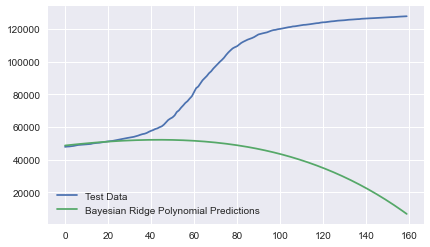

In [78]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

In [79]:
# bayesian ridge polynomial regression - Deaths
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search2 = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search2.fit(bayesian_poly_X_train_death, y_train_death)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [80]:
bayesian_search2.best_params_

{'tol': 0.001,
 'normalize': False,
 'lambda_2': 1e-07,
 'lambda_1': 0.001,
 'alpha_2': 0.001,
 'alpha_1': 1e-05}

In [81]:
bayesian_death = bayesian_search2.best_estimator_
test_bayesian_pred2 = bayesian_death.predict(bayesian_poly_X_test_death)
bayesian_pred2 = bayesian_death.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred2, y_test_death))
print('MSE:',mean_squared_error(test_bayesian_pred2, y_test_death))

MAE: 948.618024063972
MSE: 1514895.302047862


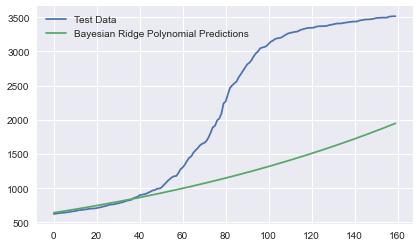

In [82]:
plt.plot(y_test_death)
plt.plot(test_bayesian_pred2)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

# Visualizing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate

In [120]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

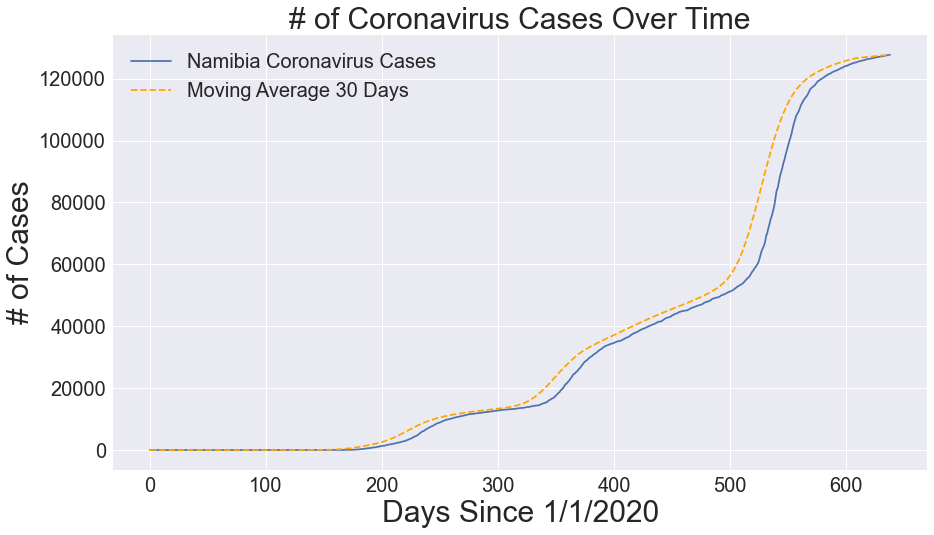

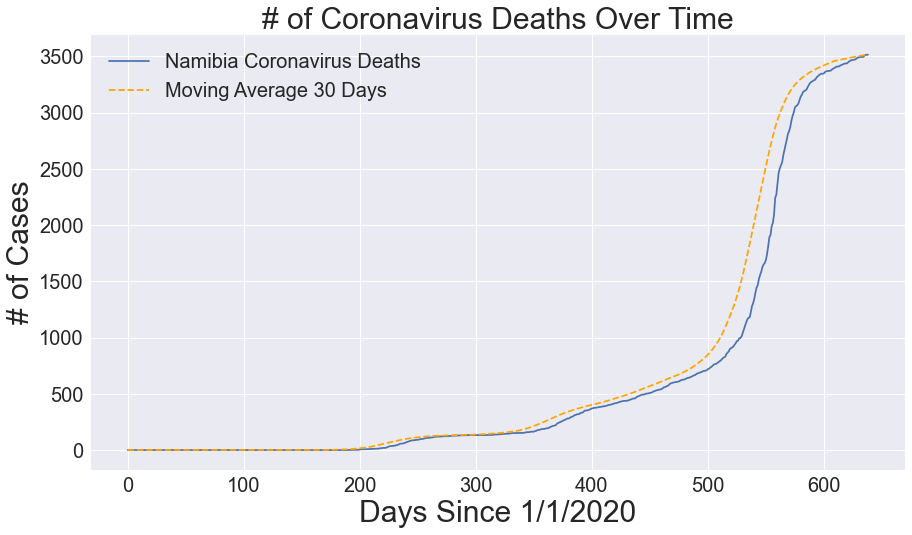

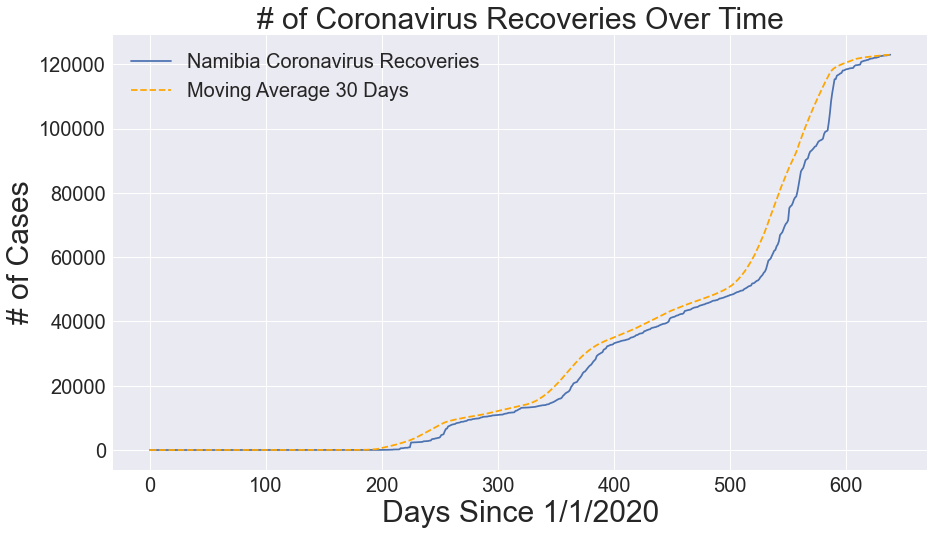

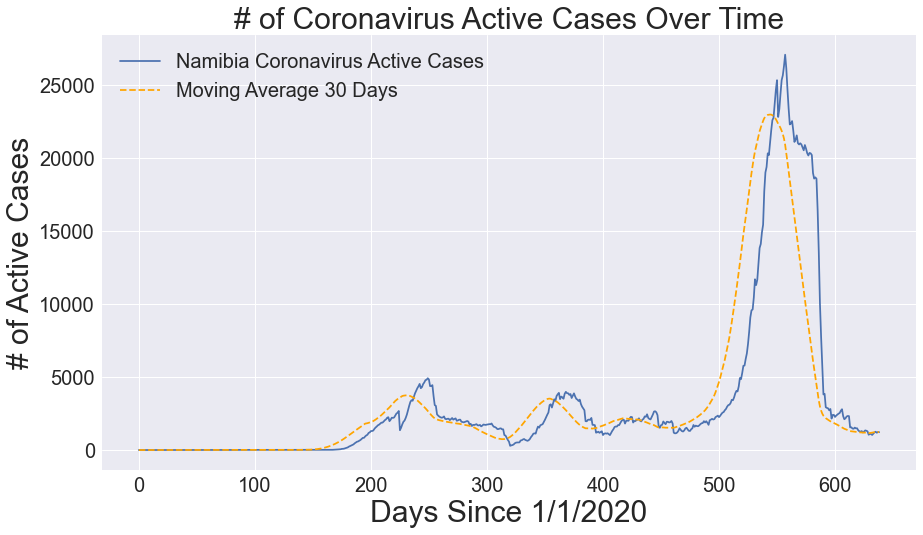

In [121]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, country_cases)
plt.plot(adjusted_dates, country_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Namibia Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, country_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Namibia Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, country_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Namibia Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(13, 8))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, country_active_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.legend(['Namibia Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

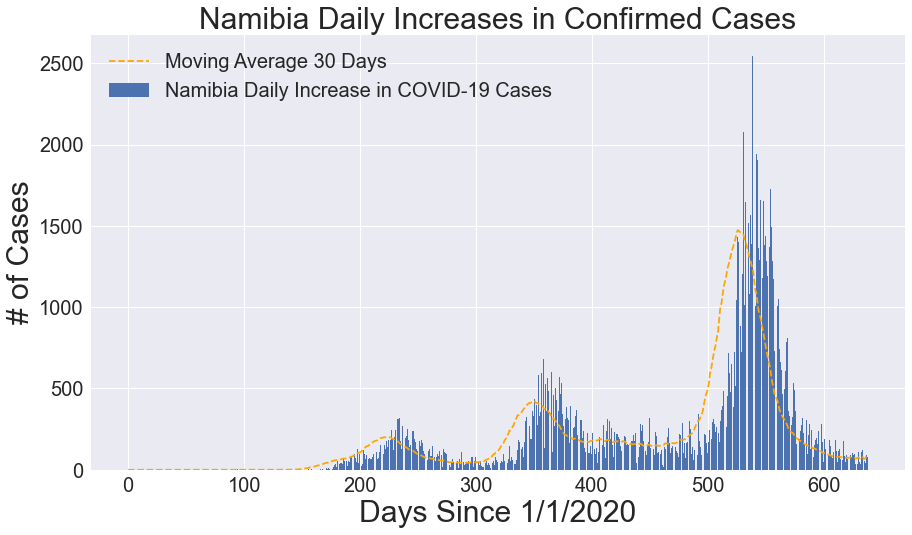

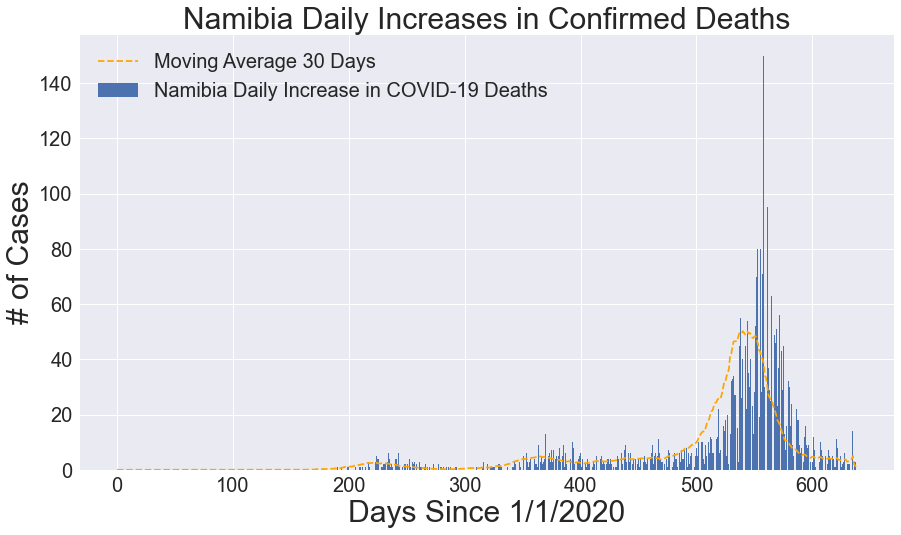

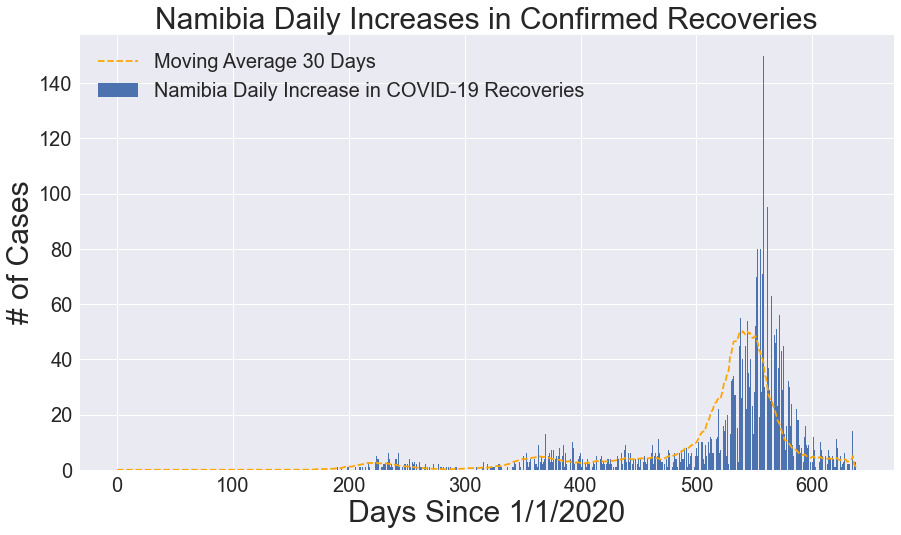

In [85]:
# daily increase
plt.figure(figsize=(13, 8))
plt.bar(adjusted_dates, country_daily_increase)
plt.plot(adjusted_dates, country_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('Namibia Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'Namibia Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(13, 8))
plt.bar(adjusted_dates, country_daily_death)
plt.plot(adjusted_dates, country_daily_death_avg, color='orange', linestyle='dashed')
plt.title('Namibia Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'Namibia Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(13, 8))
plt.bar(adjusted_dates, country_daily_recovery)
plt.plot(adjusted_dates, country_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('Namibia Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'Namibia Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



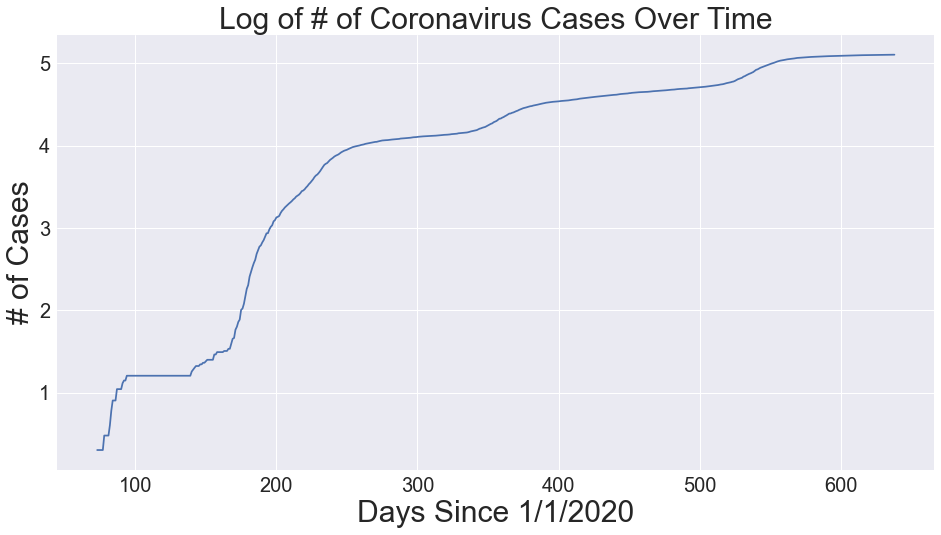

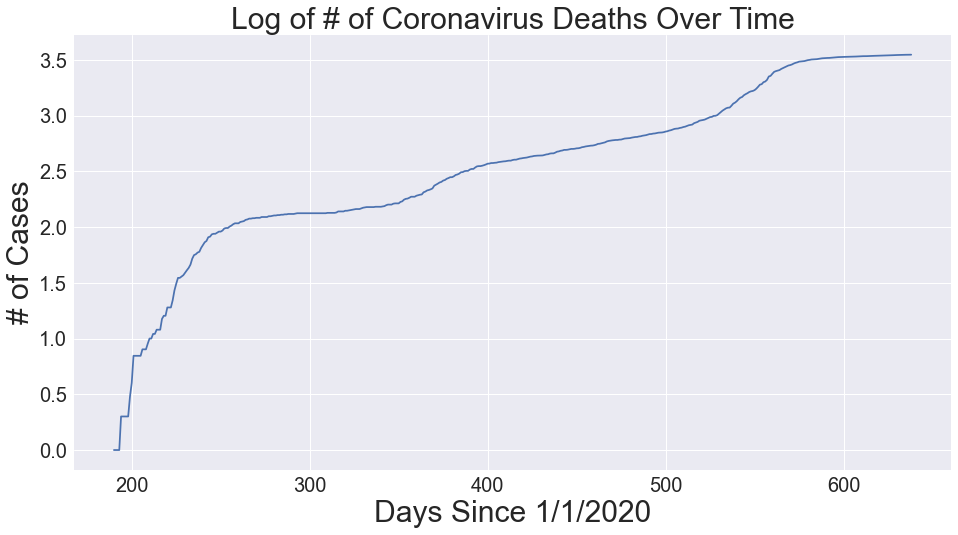

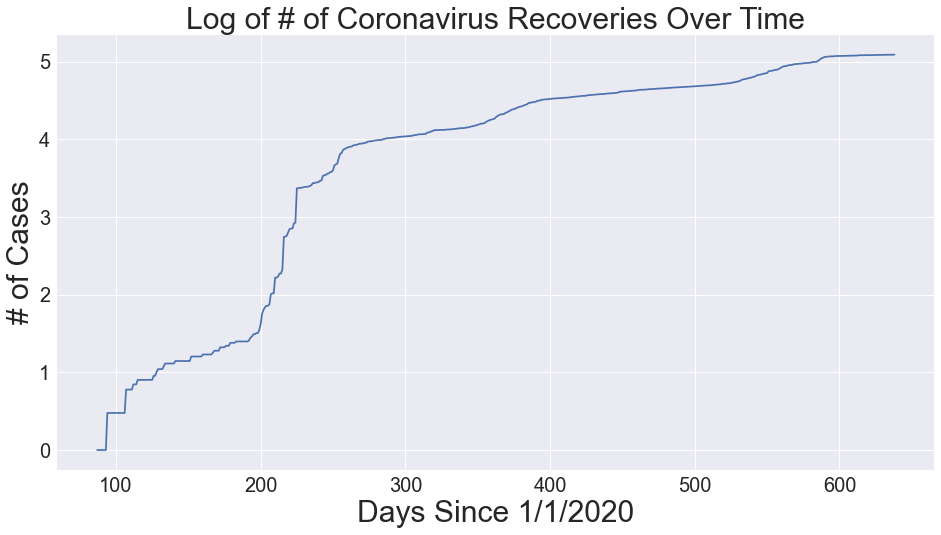

In [86]:
# log of cases over time
plt.figure(figsize=(14, 8))
plt.plot(adjusted_dates, np.log10(country_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [87]:
def region_plot(x, y1, y2, y3, y4, region):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(12, 8))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(region), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(region), size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(region)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(region), size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(region)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(region), size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(14, 8))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(region)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(region), size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting region's cases, deaths, and recoveries        
def get_region_info(region_name):
    region_cases = []
    region_deaths = []
    region_recoveries = []  
    
    for i in dates:
        region_cases.append(confirmed_cases[confirmed_cases['Region']==region_name][i].sum())
        region_deaths.append(death_cases[death_cases['Region']==region_name][i].sum())
        region_recoveries.append(recovered_cases[recovered_cases['Region']==region_name][i].sum())
    return (region_cases, region_deaths, region_recoveries)
    
    
def region_visualizations(region_name):
    region_info = get_region_info(region_name)
    region_cases = region_info[0]
    region_deaths = region_info[1]
    region_recoveries = region_info[2]
    
    region_daily_increase = daily_increase(region_cases)
    region_daily_death = daily_increase(region_deaths)
    region_daily_recovery = daily_increase(region_recoveries)
    
    region_plot(adjusted_dates, region_cases, region_daily_increase, region_daily_death, region_daily_recovery, region_name)
    

# Region Specific Graphs

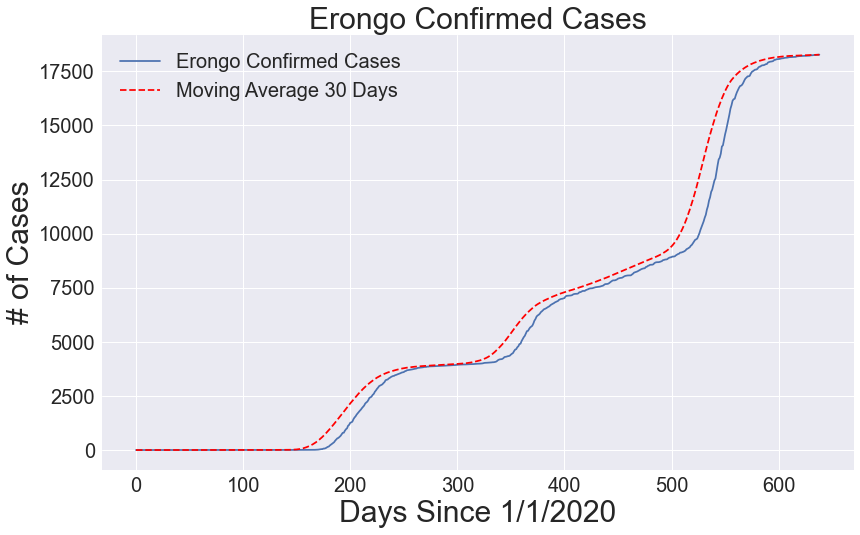

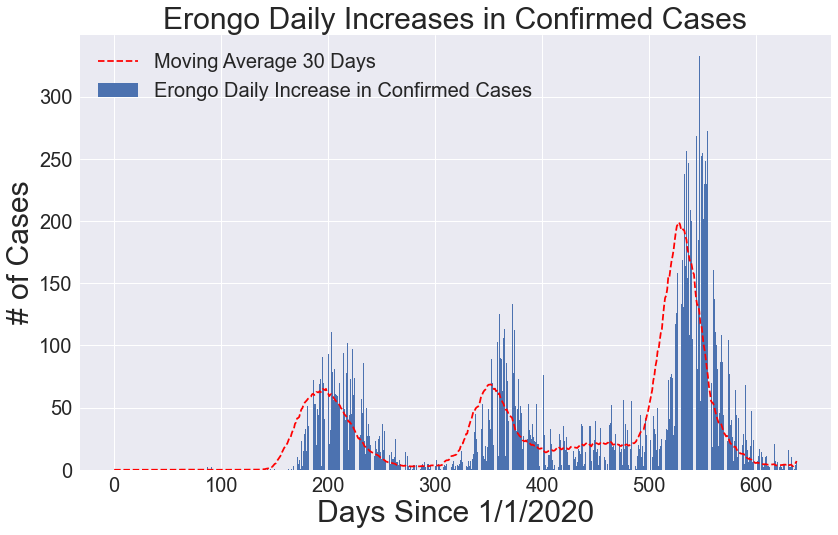

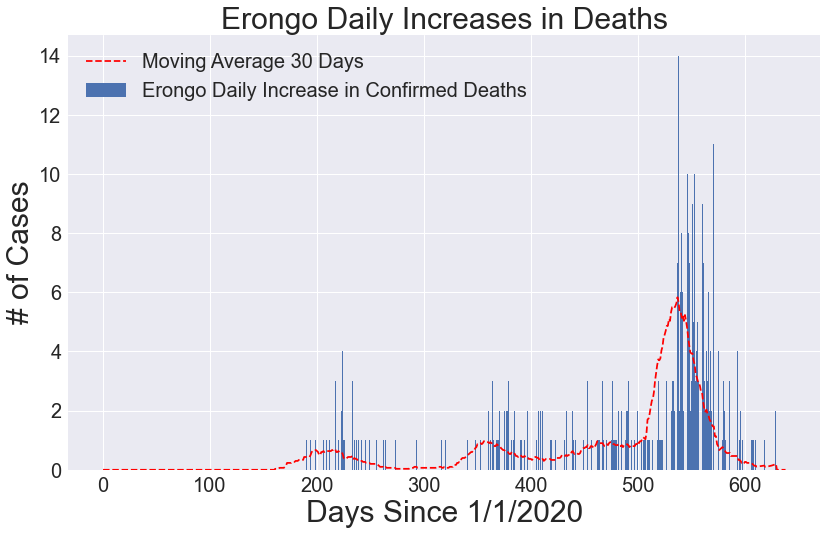

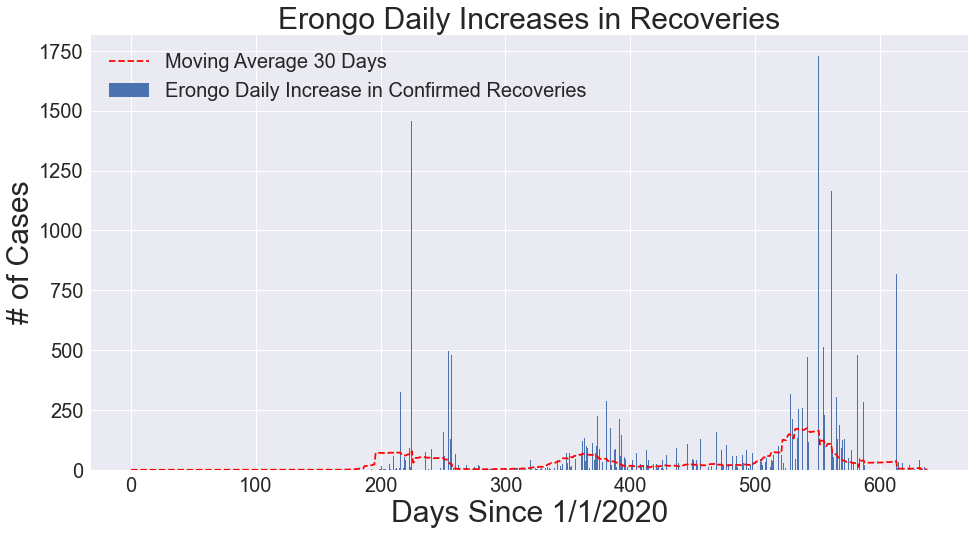

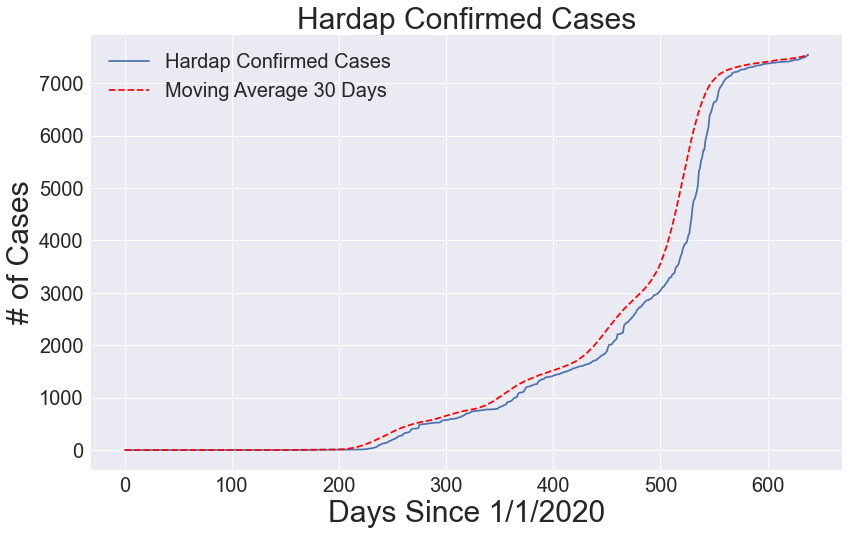

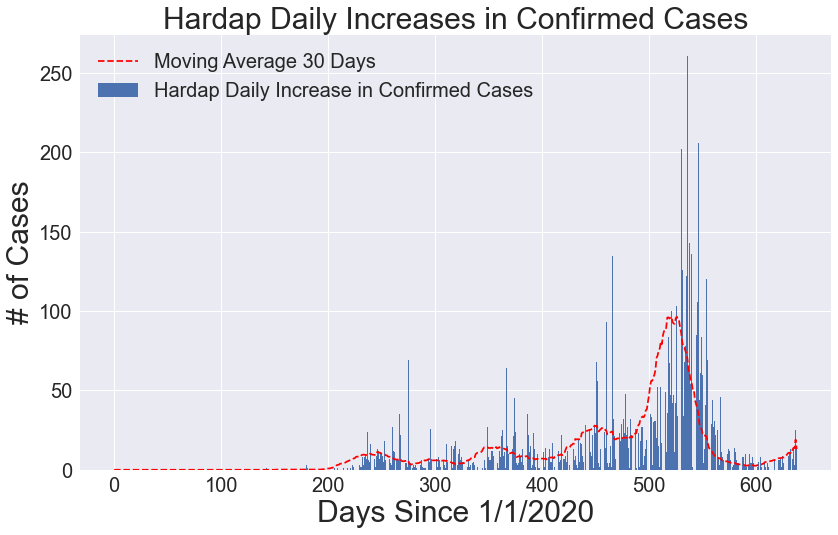

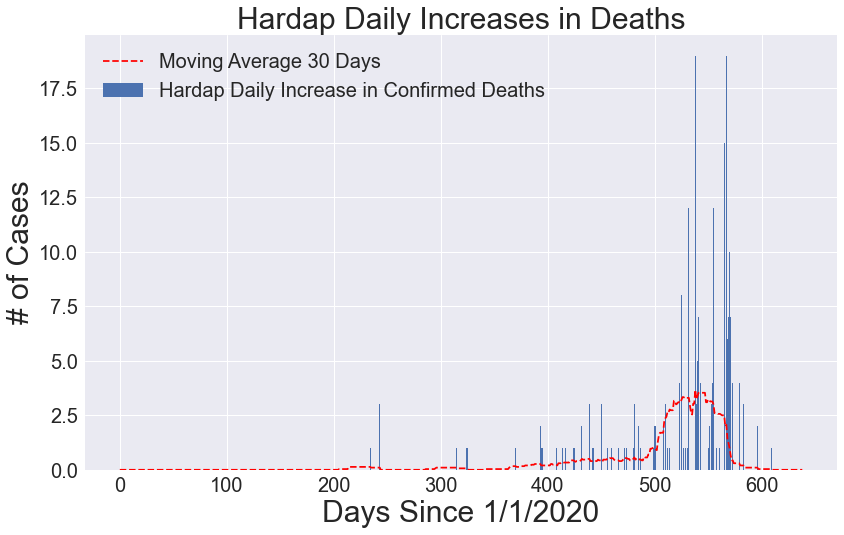

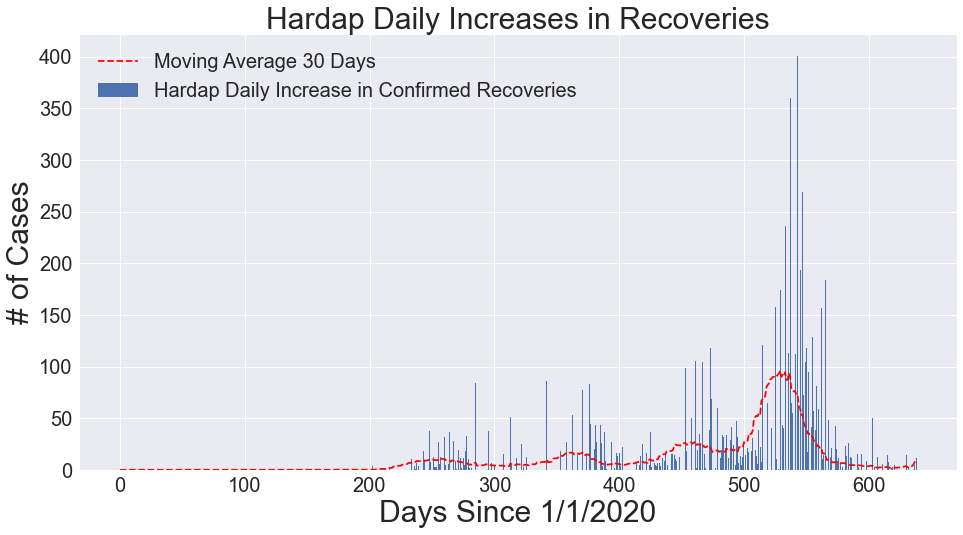

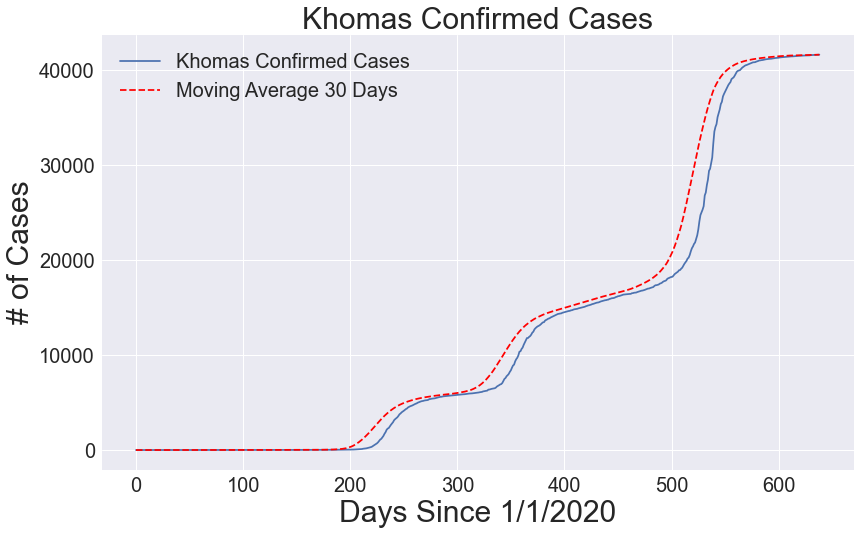

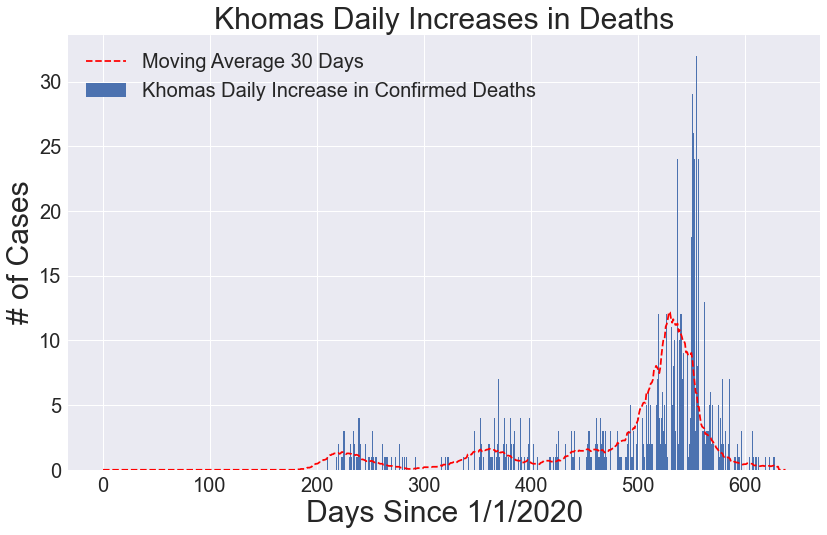

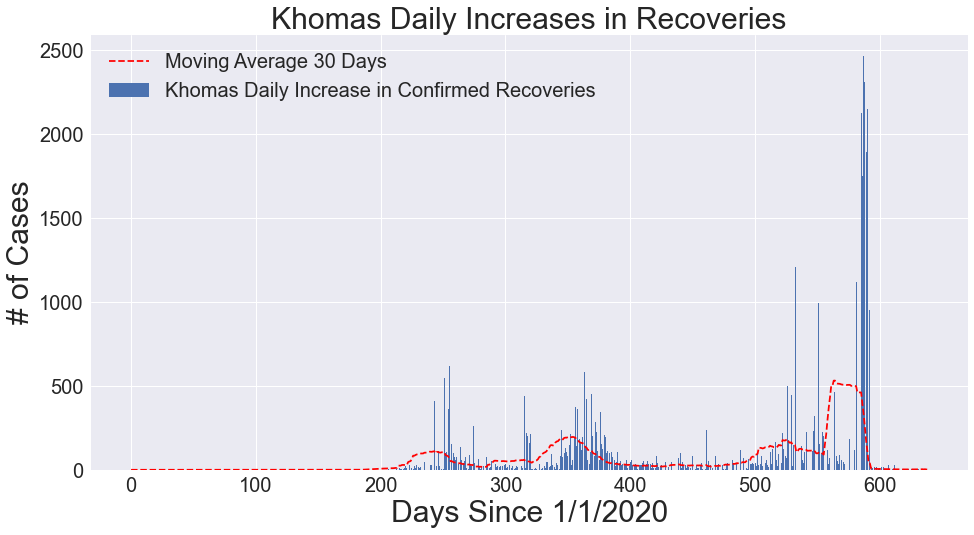

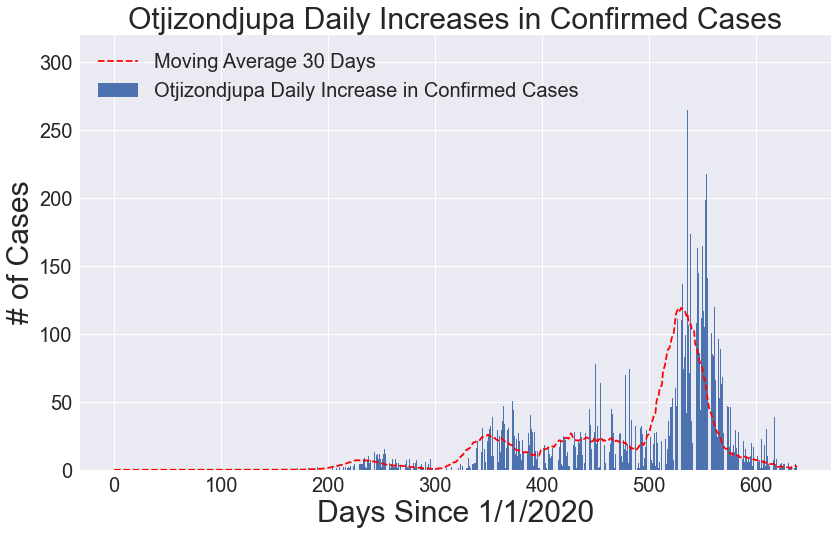

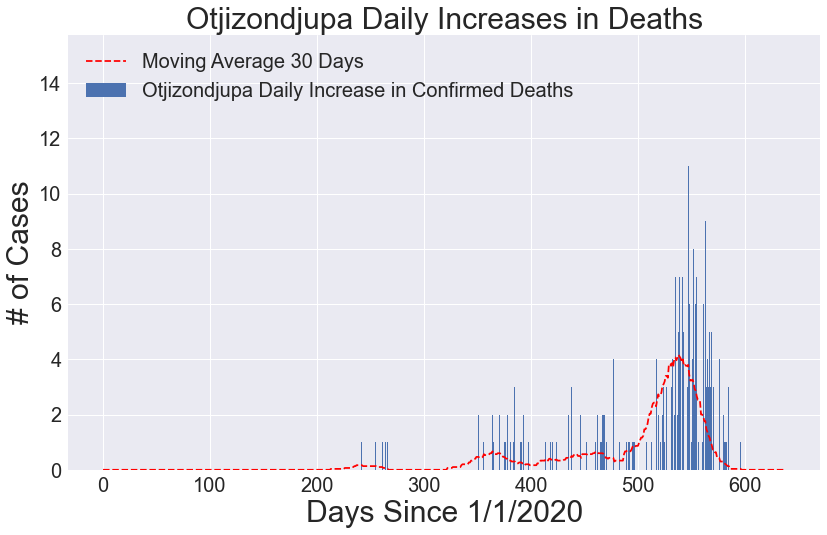

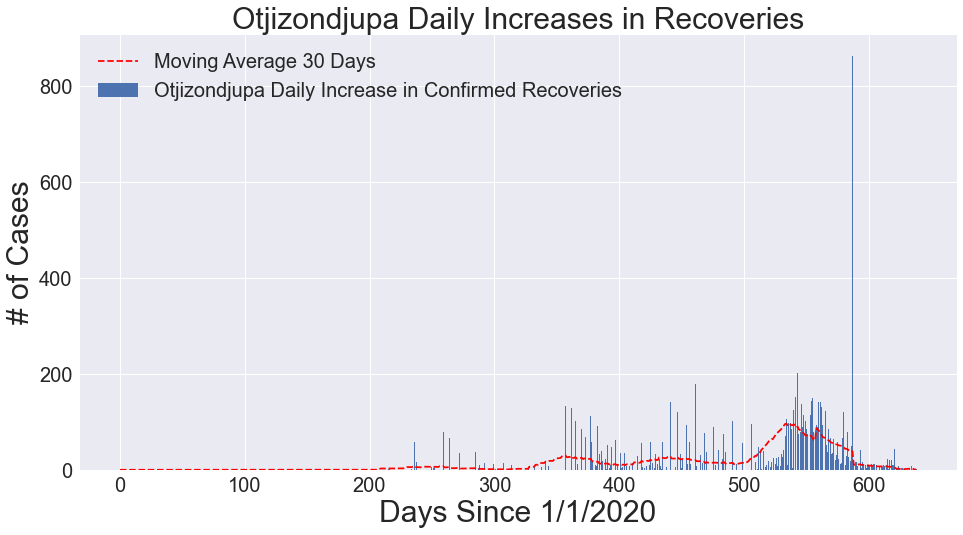

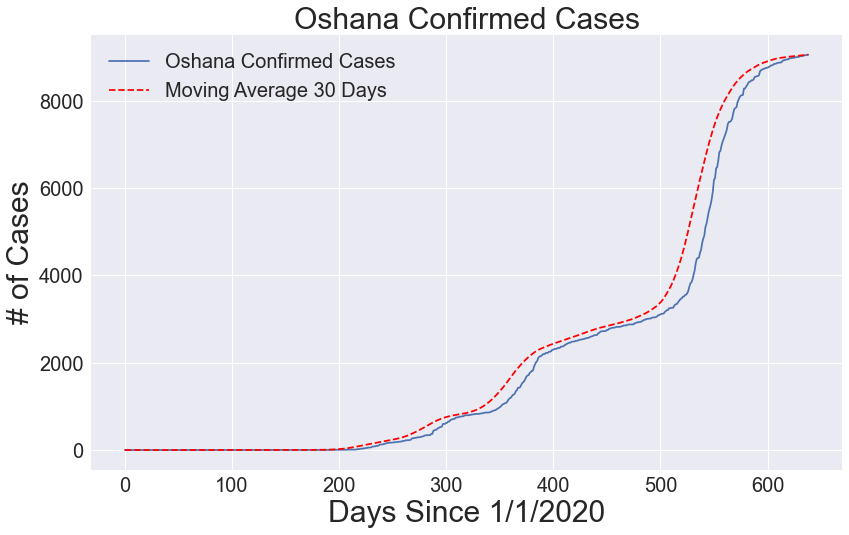

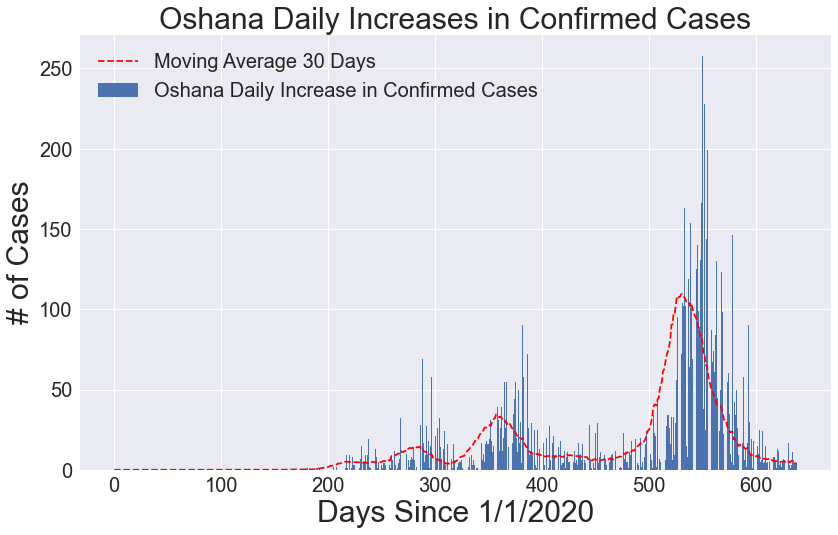

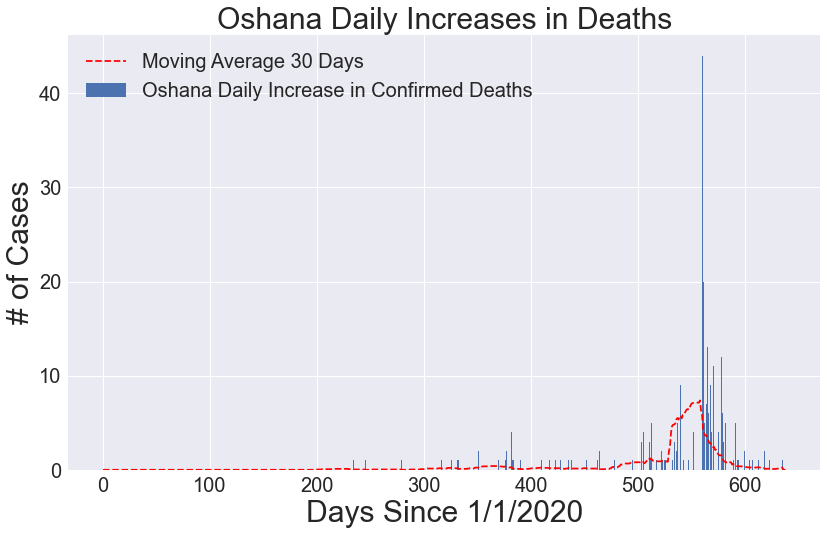

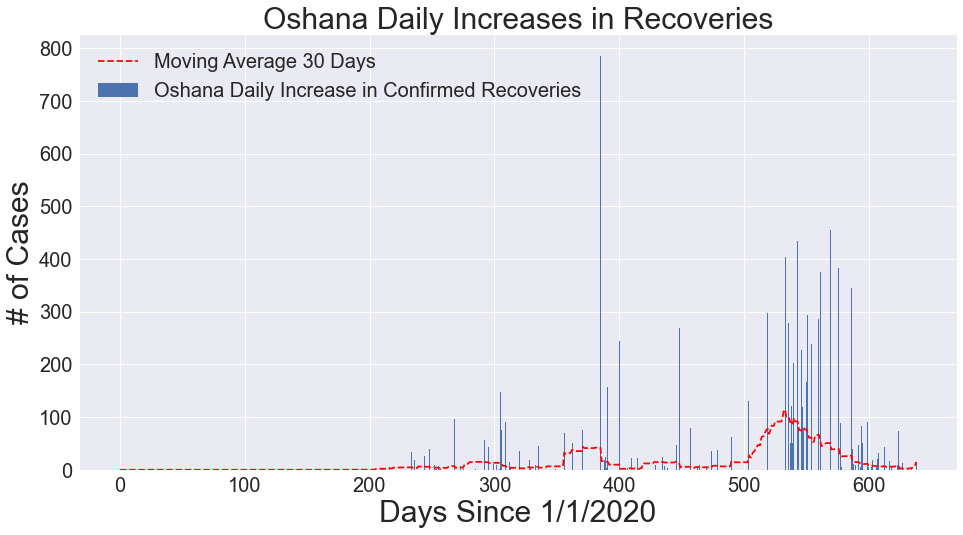

In [92]:
regions = ['Erongo', 'Hardap', 'Khomas', 'Otjizondjupa', 'Oshana'
           #, 'Kavango West','Ohangwena', 'Omaheke', 'Omusati', 'Oshana', 'Ohsikoto', 'Otjizondjupa', 'Zambezi'
          ] 

for region in regions:
    region_visualizations(region)

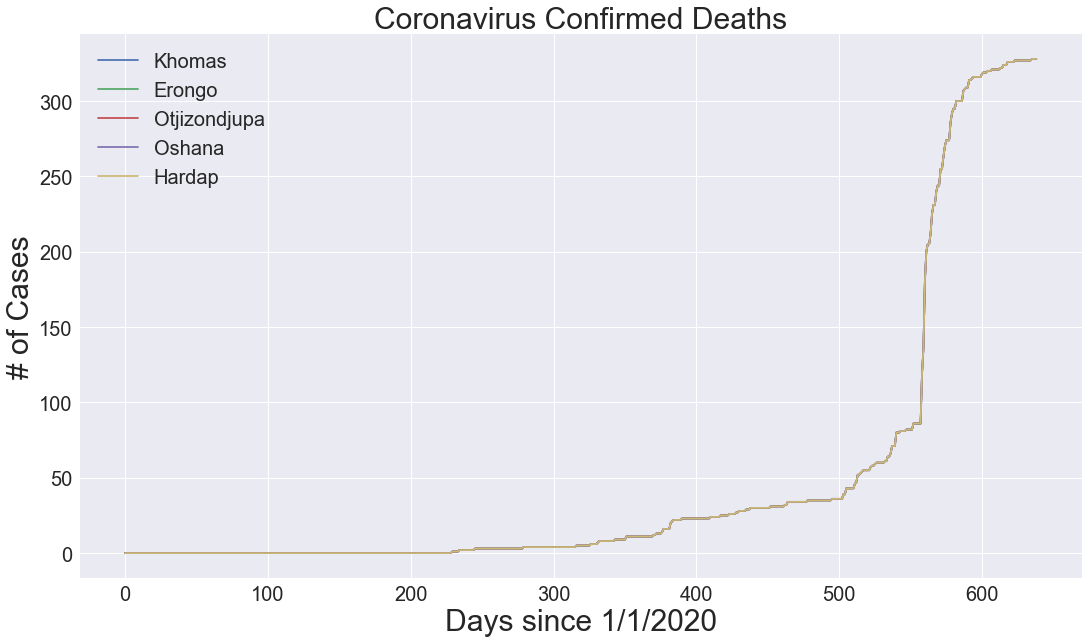

In [93]:
# Region Comparison
# removed redundant code

compare_regions = ['Khomas', 'Erongo', 'Otjizondjupa', 'Oshana', 'Hardap'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths', 'Coronavirus Confirmed Recoveries']

for num in range(2):
    plt.figure(figsize=(16, 10))
    for country in compare_regions:
        plt.plot(get_region_info(region)[num])
    plt.legend(compare_regions, prop={'size': 20})
    plt.xlabel('Days since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [122]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(14, 8))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Country Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

Predictions for confirmed coronavirus cases countrywide

In [123]:
plot_predictions(adjusted_dates, country_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

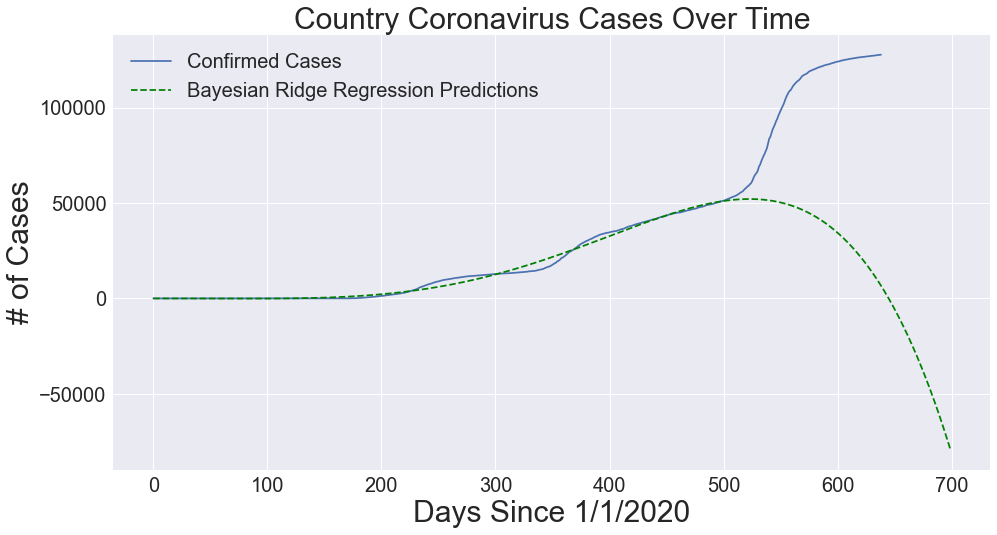

In [124]:
plot_predictions(adjusted_dates, country_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [125]:
def plot_predictions2(x, y, pred, algo_name, color):
    plt.figure(figsize=(14, 8))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Country Coronavirus Deaths Over Time', size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Deaths', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

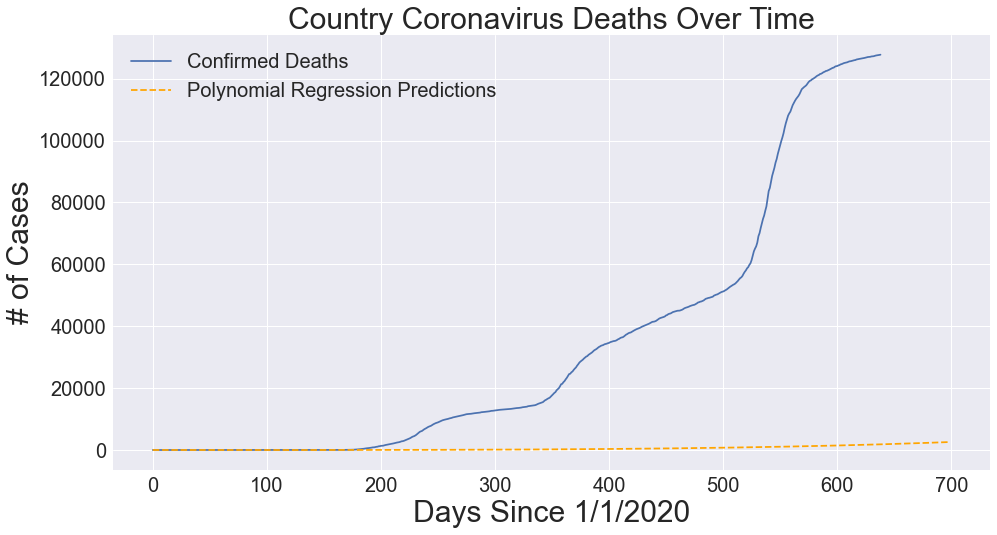

In [126]:
plot_predictions2(adjusted_dates, country_cases, linear_pred2, 'Polynomial Regression Predictions', 'orange')

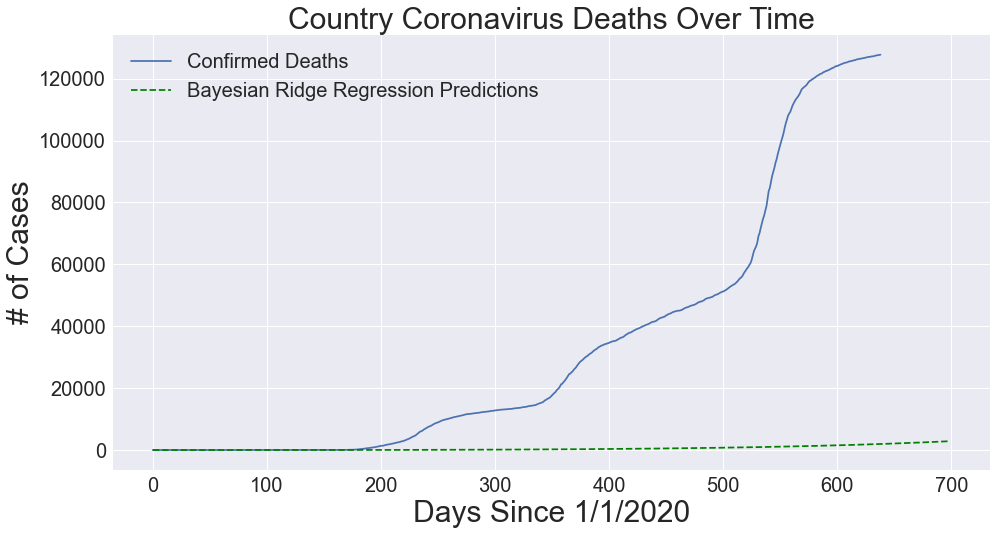

In [127]:
plot_predictions2(adjusted_dates, country_cases, bayesian_pred2, 'Bayesian Ridge Regression Predictions', 'green')

In [129]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-61:], 'Polynomial Predicted # of Confirmed Cases Countrywide': np.round(linear_pred[-61:])})
linear_df.style.background_gradient(cmap='Reds')

In [130]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-61:], 'Bayesian Ridge Predicted # of Confirmed Cases Countrywide': np.round(bayesian_pred[-61:])})
bayesian_df.style.background_gradient(cmap='Reds')

Mortality Rate (countrywide) *susceptible to change *

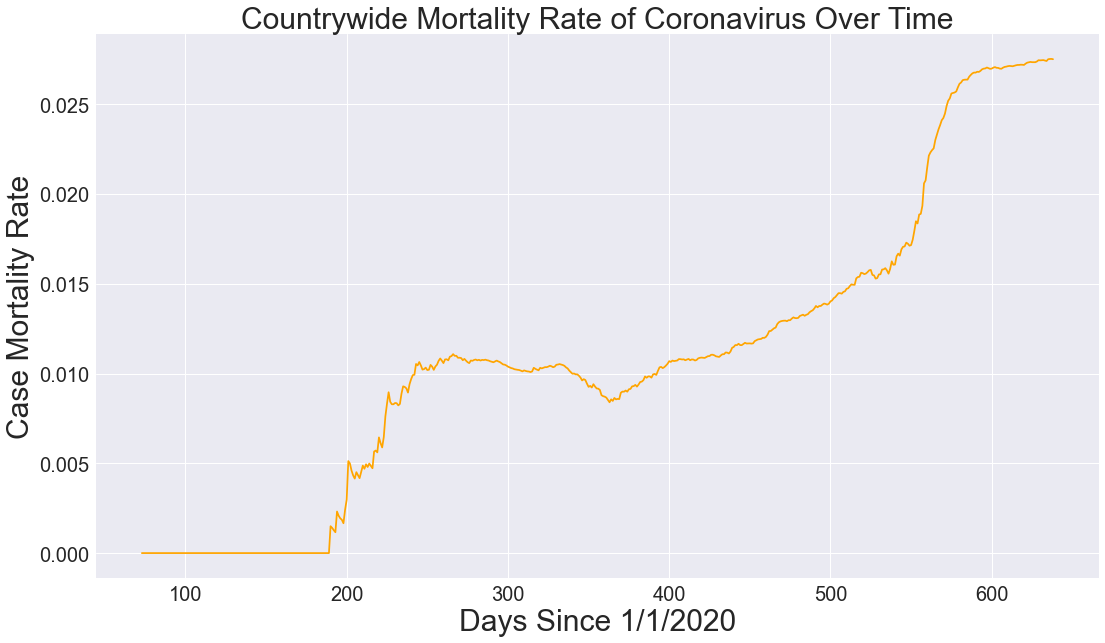

In [131]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Countrywide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (countrywide) *suceptible to change *

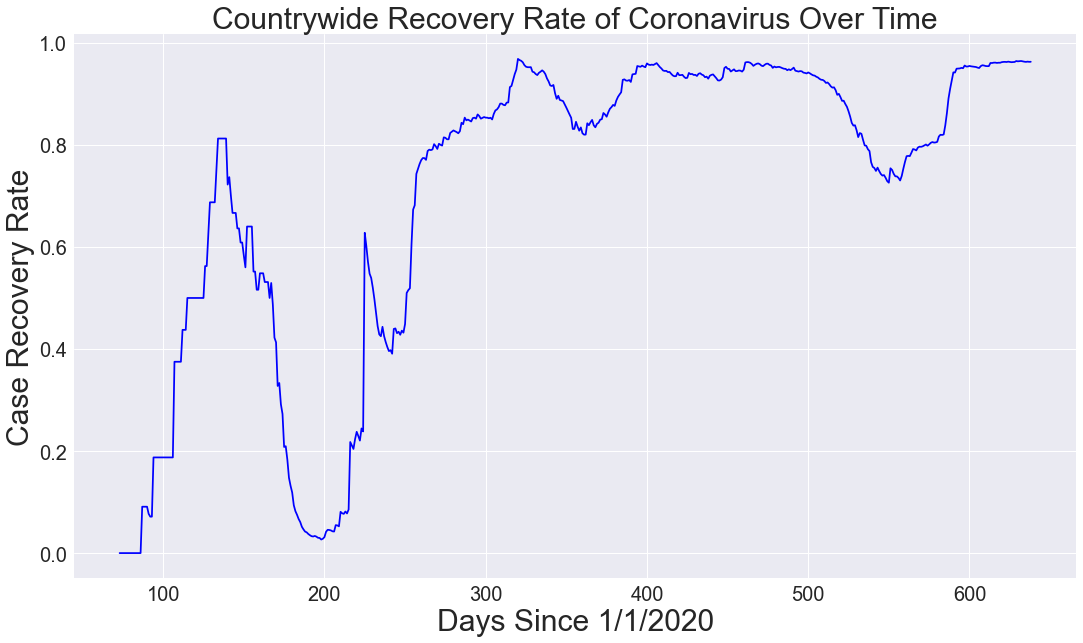

In [132]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.title('Countrywide Recovery Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/1/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Graphing deaths against recoveries

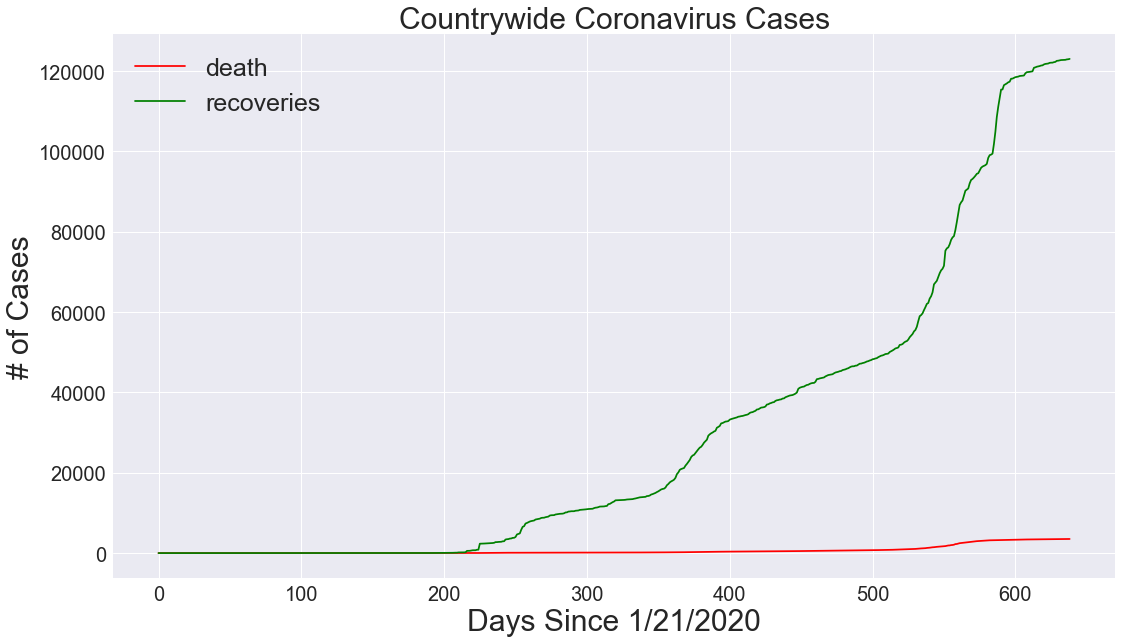

In [133]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=25)
plt.title('Countrywide Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/21/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Plotting the number of deaths against the number of recoveries

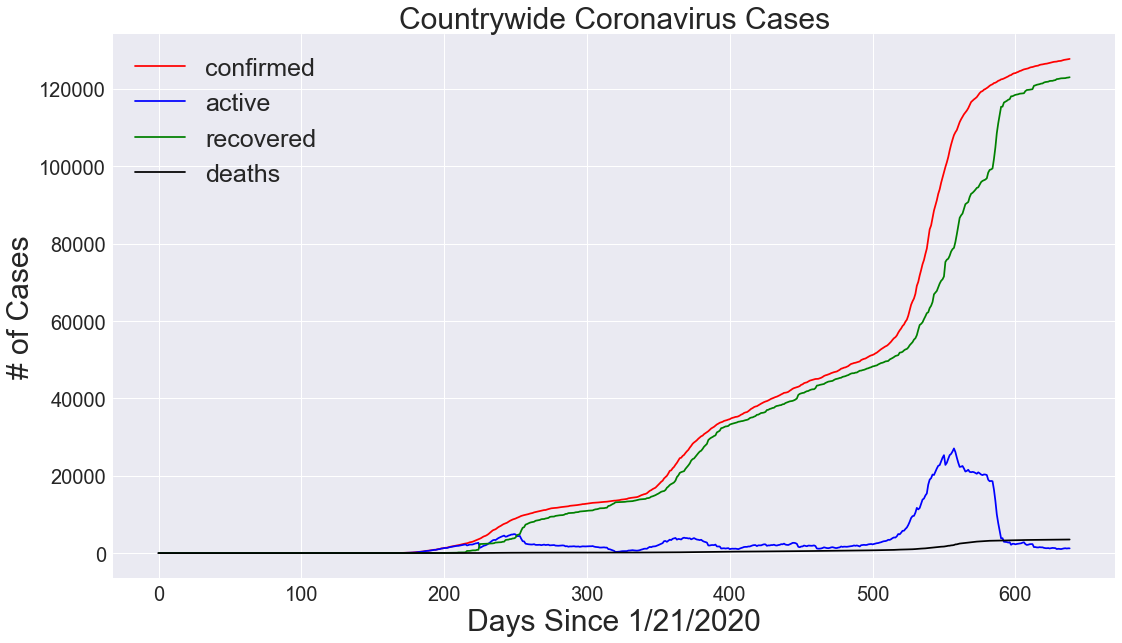

In [142]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, country_cases, color='r')
plt.plot(adjusted_dates, total_active, color='blue')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.plot(adjusted_dates, total_deaths, color='black')
plt.legend(['confirmed', 'active', 'recovered', 'deaths'], loc='best', fontsize=25)
plt.title('Countrywide Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/21/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Fecthing Data and creating a time series for visualization

In [4]:
# fetching Data! Import the data 
time_series = pd.read_csv('Covid_data_Namibia.csv', encoding = 'ISO-8859-1')
time_series['Date'] = pd.to_datetime(time_series['Date'])

In [5]:
time_series

Date  Daily_New_Cases  Accumulative_Cases  Male  Female  \
0   2020-03-14                2                   2     1       1   
1   2020-03-15                0                   2     0       0   
2   2020-03-16                0                   2     0       0   
3   2020-03-17                0                   2     0       0   
4   2020-03-18                0                   2     0       0   
..         ...              ...                 ...   ...     ...   
561 2021-09-26              120              127493    55      65   
562 2021-09-27               53              127546    20      33   
563 2021-09-28               43              127589    19      24   
564 2021-09-29               91              127680    39      52   
565 2021-09-30               76              127756    34      42   

     Daily_Recoveries  Accumulative_Recoveries  Active_Cases  Daily _Deaths  \
0                   0                        0             2              0   
1                   0                        0             2              0   
2                   0                        0             2              0   
3                   0                        0             2              0   
4                   0                        0             2              0   
..                ...                      ...           ...            ...   
561                35                   122788          1199              0   
562                 0                   122788          1238             14   
563               105                   122893          1173              3   
564                38                   122931          1223              3   
565                88                   123019          1211              0   

     Accumulative_Daily_Deaths  Accumulative_Non_Covid_Deaths  \
0                            0                              0   
1                            0                              0   
2                            0                              0   
3                            0                              0   
4                            0                              0   
..                         ...                            ...   
561                       3494                             12   
562                       3508                             12   
563                       3511                             12   
564                       3514                             12   
565                       3514                             12   

     Learners_infected  Total_tests_Conducted  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0  
..                 ...                    ...  
561                 64                 698457  
562                  0                 700104  
563                 11                      0  
564                 31                 703334  
565                 39                 705503  

[566 rows x 13 columns]

In [6]:
# Creating Time series analysis
time_series_dates = time_series.groupby('Date').sum()
time_series_dates

Daily_New_Cases  Accumulative_Cases  Male  Female  \
Date                                                            
2020-03-14                2                   2     1       1   
2020-03-15                0                   2     0       0   
2020-03-16                0                   2     0       0   
2020-03-17                0                   2     0       0   
2020-03-18                0                   2     0       0   
...                     ...                 ...   ...     ...   
2021-09-26              120              127493    55      65   
2021-09-27               53              127546    20      33   
2021-09-28               43              127589    19      24   
2021-09-29               91              127680    39      52   
2021-09-30               76              127756    34      42   

            Daily_Recoveries  Accumulative_Recoveries  Active_Cases  \
Date                                                                  
2020-03-14                 0                        0             2   
2020-03-15                 0                        0             2   
2020-03-16                 0                        0             2   
2020-03-17                 0                        0             2   
2020-03-18                 0                        0             2   
...                      ...                      ...           ...   
2021-09-26                35                   122788          1199   
2021-09-27                 0                   122788          1238   
2021-09-28               105                   122893          1173   
2021-09-29                38                   122931          1223   
2021-09-30                88                   123019          1211   

            Daily _Deaths  Accumulative_Daily_Deaths  \
Date                                                   
2020-03-14              0                          0   
2020-03-15              0                          0   
2020-03-16              0                          0   
2020-03-17              0                          0   
2020-03-18              0                          0   
...                   ...                        ...   
2021-09-26              0                       3494   
2021-09-27             14                       3508   
2021-09-28              3                       3511   
2021-09-29              3                       3514   
2021-09-30              0                       3514   

            Accumulative_Non_Covid_Deaths  Learners_infected  \
Date                                                           
2020-03-14                              0                  0   
2020-03-15                              0                  0   
2020-03-16                              0                  0   
2020-03-17                              0                  0   
2020-03-18                              0                  0   
...                                   ...                ...   
2021-09-26                             12                 64   
2021-09-27                             12                  0   
2021-09-28                             12                 11   
2021-09-29                             12                 31   
2021-09-30                             12                 39   

            Total_tests_Conducted  
Date                               
2020-03-14                      0  
2020-03-15                      0  
2020-03-16                      0  
2020-03-17                      0  
2020-03-18                      0  
...                           ...  
2021-09-26                 698457  
2021-09-27                 700104  
2021-09-28                      0  
2021-09-29                 703334  
2021-09-30                 705503  

[566 rows x 12 columns]

In [7]:
# Cumulative cases

fig11 = go.Figure()
fig11.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Accumulative_Cases'], fill = 'tonexty',
                          line_color = 'blue'))
fig11.update_layout(title = 'Cumulative Cases Namibia')
fig11.show()

In [8]:
# Daily new cases

fig13 = go.Figure()
fig13.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Daily_New_Cases'], fill = 'tonexty',
                          line_color = 'gold'))
fig13.update_layout(title = 'Daily New Cases Namibia')
fig13.show()

In [9]:
# Cumulative death cases

fig12 = go.Figure()
fig12.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Accumulative_Daily_Deaths'], fill = 'tonexty',
                          line_color = 'red'))
fig12.update_layout(title = 'Cumulative Deaths Namibia')
fig12.show()

In [10]:
# Daily recovered cases

fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Daily_Recoveries'], fill = 'tonexty',
                          line_color = 'green'))
fig14.update_layout(title = 'Daily Recovered Cases Namibia')
fig14.show()

In [11]:
# Daily death cases

fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Daily _Deaths'], fill = 'tonexty',
                          line_color = 'hotpink'))
fig14.update_layout(title = 'Daily Death Cases Namibia')
fig14.show()

In [12]:
# No of Learners Infected since 18-Feb-2021

fig14 = go.Figure()
fig14.add_trace(go.Scatter(x = time_series_dates.index, y = time_series_dates['Learners_infected'], fill = 'tonexty',
                          line_color = 'orange'))
fig14.update_layout(title = 'Learners Infected since 18-Feb-2021')
fig14.show()

In [13]:
# fetching data
time_series = pd.read_csv('Regions.csv', encoding = 'ISO-8859-1')
time_series['Date'] = pd.to_datetime(time_series['Date'])

In [14]:
# creating time series analysis
time_series_dates = time_series.groupby('Date').sum()
time_series_dates

Confirmed  Cumulative_Cases  Recovered  Cumulative_Recoveries  \
Date                                                                        
2020-01-01          0                 0          0                      0   
2020-01-02          0                 0          0                      0   
2020-01-03          0                 0          0                      0   
2020-01-04          0                 0          0                      0   
2020-01-05          0                 0          0                      0   
...               ...               ...        ...                    ...   
2021-09-26        120            127493         35                 122788   
2021-09-27         53            127546          0                 122788   
2021-09-28         43            127589        105                 122893   
2021-09-29         91            127680         38                 122931   
2021-09-30         76            127756         88                 123019   

            Accumulated_Active_Cases  Active_Cases  Accumulated_Deaths  \
Date                                                                     
2020-01-01                         0             0                   0   
2020-01-02                         0             0                   0   
2020-01-03                         0             0                   0   
2020-01-04                         0             0                   0   
2020-01-05                         0             0                   0   
...                              ...           ...                 ...   
2021-09-26                      1199            85                3494   
2021-09-27                      1238            39                3508   
2021-09-28                      1173           -65                3511   
2021-09-29                      1223            50                3514   
2021-09-30                      1211           -12                3514   

            Deaths  Accumulated_Non_Covid_Death  Non_Covid_Death  
Date                                                              
2020-01-01       0                            0                0  
2020-01-02       0                            0                0  
2020-01-03       0                            0                0  
2020-01-04       0                            0                0  
2020-01-05       0                            0                0  
...            ...                          ...              ...  
2021-09-26       0                           12                0  
2021-09-27      14                           12                0  
2021-09-28       3                           12                0  
2021-09-29       3                           12                0  
2021-09-30       0                           12                0  

[639 rows x 10 columns]

In [18]:
# Confirmed Cases per Regions (Bubble plot)

confirmed = pd.DataFrame(latest_data.groupby('Region')['Confirmed'].sum().nlargest(14).sort_values(ascending = False))
fig1 = px.scatter(confirmed, x = confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = confirmed.index, title = 'Confirmed Cases per Region')
fig1.show()

In [20]:
# Deaths per Region (h-Bar plot)

deaths = pd.DataFrame(latest_data.groupby('Region')['Deaths'].sum().nlargest(14).sort_values(ascending = True))
fig2 = px.bar(deaths, x = 'Deaths', y = deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Death Cases per Region')
fig2.show()

In [22]:
# Active Cases

active = pd.DataFrame(latest_data.groupby('Region')['Active_Cases'].sum().nlargest(14).sort_values(ascending = True))
fig4 = px.bar(active, x = 'Active_Cases', y = active.index, height = 600, color = 'Active_Cases', orientation = 'h',
             color_continuous_scale = ['purple','blue'], title = 'Active Cases per Region')
fig4.show()

In [24]:
# Recoveries per Region (Bar plot)

recovered = pd.DataFrame(latest_data.groupby('Region')['Recovered'].sum().nlargest(14).sort_values(ascending = False))
fig3 = px.bar(recovered, x = recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Recovered Cases per Region', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

In [25]:
# Creating a time series for each Region
# Khomas 
time_series_Khomas = time_series['Region'] == ('Khomas')
time_series_Khomas = time_series[time_series_Khomas]

# Erongo
time_series_Erongo = time_series['Region'] == ('Erongo')
time_series_Erongo = time_series[time_series_Erongo]

# Otjizondjupa
time_series_Otjizondjupa = time_series['Region'] == ('Otjizondjupa')
time_series_Otjizondjupa = time_series[time_series_Otjizondjupa]

# Oshana
time_series_Oshana = time_series['Region'] == ('Oshana')
time_series_Oshana = time_series[time_series_Oshana]

# Karas
time_series_Karas = time_series['Region'] == ('Karas')
time_series_Karas = time_series[time_series_Karas]

# Hardap
time_series_Hardap = time_series['Region'] == ('Hardap')
time_series_Hardap = time_series[time_series_Hardap]

# Kunene
time_series_Kunene = time_series['Region'] == ('Kunene')
time_series_Kunene = time_series[time_series_Kunene]

# Kavango East
time_series_Kavango_East = time_series['Region'] == ('Kavango East')
time_series_Kavango_East = time_series[time_series_Kavango_East]

# Kavango West
time_series_Kavango_West = time_series['Region'] == ('Kavango West')
time_series_Kavango_West = time_series[time_series_Kavango_West]

# Zambezi
time_series_Zambezi = time_series['Region'] == ('Zambezi')
time_series_Zambezi = time_series[time_series_Zambezi]

# Omusati
time_series_Omusati = time_series['Region'] == ('Omusati')
time_series_Omusati = time_series[time_series_Omusati]

# Omaheke
time_series_Omaheke = time_series['Region'] == ('Omaheke')
time_series_Omaheke = time_series[time_series_Omaheke]

# Oshikoto
time_series_Oshikoto = time_series['Region'] == ('Oshikoto')
time_series_Oshikoto = time_series[time_series_Oshikoto]

# Ohangwena
time_series_Ohangwena = time_series['Region'] == ('Ohangwena')
time_series_Ohangwena = time_series[time_series_Ohangwena]

In [26]:
# Cumulative cases of Top 5 Affected Regions

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_Khomas['Date'], y = time_series_Khomas['Cumulative_Cases'], name = 'Khomas'))
fig15.add_trace(go.Line(x = time_series_Erongo['Date'], y = time_series_Erongo['Cumulative_Cases'], name = 'Erongo'))
fig15.add_trace(go.Line(x = time_series_Otjizondjupa['Date'], y = time_series_Otjizondjupa['Cumulative_Cases'], name = 'Otjizondjupa'))
fig15.add_trace(go.Line(x = time_series_Oshana['Date'], y = time_series_Oshana['Cumulative_Cases'], name = 'Oshana'))
fig15.add_trace(go.Line(x = time_series_Karas['Date'], y = time_series_Karas['Cumulative_Cases'], name = 'Karas'))

fig15.update_layout(title = 'Time Series of Most Affected Regions"s Cumulative Cases')

fig15.show()

C:\Users\Zania Groenewaldt\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [27]:
# Cumulative death cases

fig16 = go.Figure()

fig16.add_trace(go.Line(x = time_series_Khomas['Date'], y = time_series_Khomas['Accumulated_Deaths'], name = 'Khomas'))
fig16.add_trace(go.Line(x = time_series_Erongo['Date'], y = time_series_Erongo['Accumulated_Deaths'], name = 'Erongo'))
fig16.add_trace(go.Line(x = time_series_Otjizondjupa['Date'], y = time_series_Otjizondjupa['Accumulated_Deaths'], name = 'Otjizondjupa'))
fig16.add_trace(go.Line(x = time_series_Oshana['Date'], y = time_series_Oshana['Accumulated_Deaths'], name = 'Oshana'))
fig16.add_trace(go.Line(x = time_series_Hardap['Date'], y = time_series_Hardap['Accumulated_Deaths'], name = 'Hardap'))
fig16.add_trace(go.Line(x = time_series_Karas['Date'], y = time_series_Karas['Accumulated_Deaths'], name = 'Karas'))
fig16.add_trace(go.Line(x = time_series_Kunene['Date'], y = time_series_Kunene['Accumulated_Deaths'], name = 'Kunene'))
fig16.add_trace(go.Line(x = time_series_Kavango_East['Date'], y = time_series_Kavango_East['Accumulated_Deaths'], name = 'Kavango East'))
fig16.add_trace(go.Line(x = time_series_Kavango_West['Date'], y = time_series_Kavango_West['Accumulated_Deaths'], name = 'Kavango West'))
fig16.add_trace(go.Line(x = time_series_Ohangwena['Date'], y = time_series_Ohangwena['Accumulated_Deaths'], name = 'Ohangwena'))
fig16.add_trace(go.Line(x = time_series_Omaheke['Date'], y = time_series_Omaheke['Accumulated_Deaths'], name = 'Omaheke'))
fig16.add_trace(go.Line(x = time_series_Omusati['Date'], y = time_series_Omusati['Accumulated_Deaths'], name = 'Omusati'))
fig16.add_trace(go.Line(x = time_series_Oshikoto['Date'], y = time_series_Oshikoto['Accumulated_Deaths'], name = 'Oshikoto'))
fig16.add_trace(go.Line(x = time_series_Zambezi['Date'], y = time_series_Zambezi['Accumulated_Deaths'], name = 'Zambezi'))

fig16.update_layout(title = 'Time Series of Region"s Cumulative Death Cases')

fig16.show()

In [28]:
# Daily new cases

fig17 = go.Figure()

fig17.add_trace(go.Line(x = time_series_Khomas['Date'], y = time_series_Khomas['Confirmed'], name = 'Khomas'))
fig17.add_trace(go.Line(x = time_series_Khomas['Date'], y = time_series_Khomas['Confirmed'], name = 'Erongo'))
fig17.add_trace(go.Line(x = time_series_Otjizondjupa['Date'], y = time_series_Otjizondjupa['Confirmed'], name = 'Otjizondjupa'))
fig17.add_trace(go.Line(x = time_series_Oshana['Date'], y = time_series_Oshana['Confirmed'], name = 'Oshana'))
fig17.add_trace(go.Line(x = time_series_Hardap['Date'], y = time_series_Hardap['Confirmed'], name = 'Hardap'))

fig17.update_layout(title = 'Time Series of Most Affected Region"s Daily New Cases')

fig17.show()

In [29]:
# Cumulative cases of the "O" Regions

fig15 = go.Figure()

fig15.add_trace(go.Line(x = time_series_Oshana['Date'], y = time_series_Oshana['Cumulative_Cases'], name = 'Oshana'))
fig15.add_trace(go.Line(x = time_series_Ohangwena['Date'], y = time_series_Ohangwena['Cumulative_Cases'], name = 'Ohangwena'))
fig15.add_trace(go.Line(x = time_series_Otjizondjupa['Date'], y = time_series_Otjizondjupa['Cumulative_Cases'], name = 'Otjizondjupa'))
fig15.add_trace(go.Line(x = time_series_Omusati['Date'], y = time_series_Omusati['Cumulative_Cases'], name = 'Omusati'))
fig15.add_trace(go.Line(x = time_series_Omaheke['Date'], y = time_series_Omaheke['Cumulative_Cases'], name = 'Omaheke'))

fig15.update_layout(title = 'Time Series of "O" Region"s Cumulative Cases')

fig15.show()

In [30]:
country = pd.read_csv('Regions.csv')
country_region = pd.DataFrame(country.groupby('Region')['Confirmed'].sum())

labels = country_region.index
values = country_region['Confirmed']

fig9 = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0, 0, 0, 0, 0.2, 0])])

fig9.update_layout(title = 'Region Case Distribution', width = 700, height = 400, 
                   margin = dict(t = 0, l = 0, r = 0, b = 0))

fig9.show()